<a href="https://colab.research.google.com/github/shreyasur/TSF-GRIP-JAN-21-TASK-1-PREDICTION-USING-SUPERVISED-ML/blob/main/TASK1_PREDICTION_USING_SUPERVISED_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BY - SHREYA SUR

# TASK1- PREDICTION USING SUPERVISED ML

  We will predict the percentage of a student based on the no.of study hours using simple linear regression

  PROBLEM STATEMENT- WHAT WILL BE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HOURS/DAY?



DATA SOURCE-https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

IMPORTING THE REQUIRED LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

import io

DOWNLOADING AND READING THE .CSV FILE FROM THE GIVEN SOURCE(GITHUB)

In [ ]:

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv" 
download = requests.get(url).content


READING THE DOWNLLOADED .CSV FILE AND CONVERTING IT ITNO PANDAS DATAFRAME

In [ ]:
df = pd.read_csv(io.StringIO(download.decode('utf-8')))


DISPLAYING THE PREVIEW OF THE DATAFRAME

In [ ]:
print(df.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


CHECKING THE SHAPE OF THE DATAFRAME


In [ ]:
df.shape

(25, 2)

CHECKING IF NULL VALUES ARE PRESENT IN THE DATAFRAME

In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

PLOTTING A 2-D GRAPH TO SEE ANY HIDDEN RELATIONSHIP IN THE GIVEN DATASET


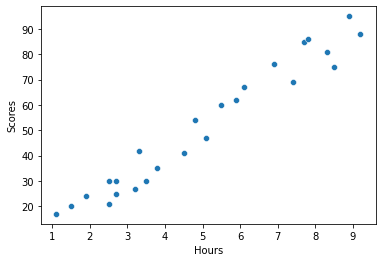

In [ ]:
sns.scatterplot(x='Hours',y='Scores',data=df)

FROM THE ABOVE GRAPH , WE CAN CONCLUDE THAT THERE IS A LINEAR RELATIONSHIP BETWEEN HOURS OF STUDYING AND THE PERCENTAGE OF SCORE OBTAINED.SINCE THERE IS ONLY ONE INPUT COLUMN AND ONE OUTPUT COLUMN ,THIS IS A PROBLEM OF SIMPLE LINEAR REGRESSION.

1.EXTRACTING INPUT AND OUTPUT COLUMNS SEPERATELY
 

*   INPUT COLUMN IS DENOTED BY 'X'
*   OUTPUT COLUMN IS DENOTED BY 'y'



In [ ]:
X=df['Hours'].values.reshape(25,1)
# since sklearn expects more than one input column ,by default it accepts 2D arrays
# as we have only one input column we are reshaping it into a 2D array

In [ ]:
print(X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [ ]:
y=df['Scores'].values

In [ ]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


2.DIVIDING DATA INTO TRAINING AND TEST SET

In [ ]:
# diving the datatframe into 80:20 ratio
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

3.TRAINING THE MODEL

In [ ]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,y_train)

print('Training successfully completed')

Training successfully completed


CHECKING THE BEST FIT LINE DRAWN BY THE LINEAR REGRESSION ALGORITHM

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


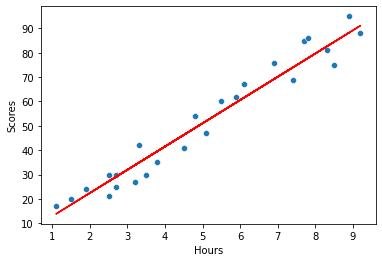

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot(X_train,reg.predict(X_train),color='red')
sns.scatterplot(df['Hours'],df['Scores'])

4.DOING PREDICTION

* since the model is trained now , we can make some predictions 

In [ ]:
y_pred=reg.predict(X_test)


In [ ]:
# reshaping the X_test column because while creating the dataframe only 1-D array is supported
X_test1=X_test.reshape(5,)

In [ ]:
# comparing the hours and the actual score from the dataset and the predicted score from the algorithm
df1=pd.DataFrame({'Hours':X_test1,'Actual_Score': y_test ,'Predicted_Score': y_pred})
df1

,Hours,Actual_Score,Predicted_Score
0,3.8,35,39.607620
1,6.1,67,61.552043
2,6.9,76,69.184885
3,5.5,60,55.827411
4,2.7,25,29.112462


5.EVALUATING THE MODEL
 * CHECKING THE METRICS TO SEE HOW OUR ALGORITHM HAS PERFORMED

In [ ]:
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)

In [ ]:
print('r2 score:',r2_score)

r2 score: 0.9549869629349366


In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 5.031148765626613


PROBLEM STATEMENT-
 * WHAT WILL BE PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HOURS/DAY?

In [ ]:
hours=9.25
hours=np.array(hours).reshape(1,1)

my_pred=reg.predict(hours)
print("If a student studies for {} hours/day , he is expected to approximatey score {} %".format(hours[0][0],my_pred[0]))

If a student studies for 9.25 hours/day , he is expected to approximatey score 91.60636004121068 %


CONCLUSION-
* OUR ALGORITHM HAS A R2_SCORE OF ~0.954 WHICH IS POSITIVE AND CLOSE TO 1, WHICH IMPLIES THAT THE TWO VARIABLES ARE STRONGLY CORRELATED WITH LOW VARIANCE.
* AND IT HAS A MEAN ABSOLUTE ERROR OF ~5.0311